<a href="https://colab.research.google.com/github/Anastasios-K/Classification/blob/master/Distributon%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This function returns subplots with a number of histograms.
The popular wine dataset is currently used for testing.
However, the fucntion can work with ant dataset without modifications

*   The optimal number of bins is calculated
*   The distribution density line is also fitted
*   The Anderson-Darling normality test is used to assist with the distribution evaluation
*   One of the most powreful techniques based on the research
*   On the top-right corner of each graph the difference between the AD t-test and the critical value is depicted
*   Distributions with AD >= 0 are ONLY considered as normal for a significance level of 0.05
*   Find the Anderson-Darling formula and a simplified explanation into the following link:
[link text](https://www.spcforexcel.com/knowledge/basic-statistics/anderson-darling-test-for-normality)

-----> The user has to define the number of columns and provide a dataset


In [0]:
# from sklearn.datasets import load_wine
# import pandas as pd
# import numpy as np
# from scipy import stats
# import matplotlib.pyplot as plt
# import seaborn as sb

In [0]:
# loading = load_wine()
# df= pd.DataFrame(loading['data'], columns = loading['feature_names']); #df['targets'] = loading['target']

In [0]:
def Distribution(df, columns_num):
  length = len(df.columns)
  lines = length%columns_num + length//columns_num
  figure = plt.figure(
      figsize= (2.4*columns_num,3.3*lines),
      facecolor='w'
      )
  plt.subplots_adjust(
      left= 0.1, 
      right= 1, 
      wspace= 0.1, 
      hspace= 0.15
      )
  sb.set_style("dark")
  x = 1
  for i, column in enumerate(df):
    #Shapiro_Wilk = np.around((np.array(stats.shapiro(df[column]))), 3)   ---> Comment out to use Shapiro Wilk test (BUT comment in the next line to avoid confusion)
    t_stat, crit_vals, _ = stats.anderson(df[column], dist='norm')
    ax = plt.subplot(lines,columns_num, i+1)
    hist, bins = np.histogram(df[column], bins= 'auto', density= True)
    sb.distplot(np.array(df[column]), bins = bins, hist= True, kde=True, color= 'b')
    ax.set_title(df.columns[i], weight = 'bold', size = 10)
    ax.axes.get_yaxis().set_visible(False)
    ax.axes.get_xaxis().set_visible(False)
    plt.text(
      bins[-1],
      hist.max(),
      #'SW' + ": " + str(Shapiro_Wilk[1]),   ---> Comment out to use Shapiro Wilk test (BUT comment in the next line to avoid confusion)
      'AD' + ': ' + str(np.around((crit_vals[2]-t_stat), 3)),
      fontsize = 8,
      fontweight = 'bold',
      color = 'r',
      ha = 'right',
      va = 'top'
      )
  plt.show()
  return figure
  
if __name__ == "__main__":
    pass

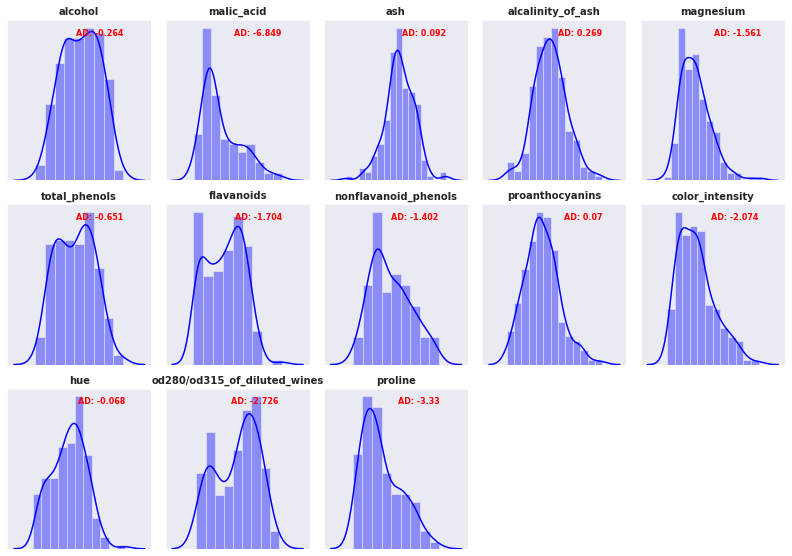

In [0]:
# a = Distribution(df,5)